In [145]:
 #1
 
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_excel("seeds_dataset.xlsx", sheet_name='seeds_dataset', header=None)

df.head()


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [146]:
df.columns = ['area', 'peri', 'compact', 'len_ker', 'width_ker', 'asym', 'len_groo', 'class_label']

df.head()

,area,peri,compact,len_ker,width_ker,asym,len_groo,class_label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [147]:
buid = 0
df = df[df['class_label'] != 3]

df.class_label.value_counts()

class_label
1    70
2    70
Name: count, dtype: int64

In [148]:
df.class_label = df.class_label - 1
df.head()

,area,peri,compact,len_ker,width_ker,asym,len_groo,class_label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [149]:
# Q1, svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

train, test = train_test_split(df, test_size=0.5, random_state=42)

train.shape

(70, 8)

In [150]:
train, test = train_test_split(df, test_size=0.5, random_state=42)

train.shape

X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

In [151]:
import sklearn.svm as svm

linear = svm.SVC(kernel='linear')

linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

acc = accuracy_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tnr = tn / (tn + fp)
tpr = tp / (tp + fn)

tp, fp, tn, fn, acc, tpr, tnr

(29, 3, 36, 2, 0.9285714285714286, 0.9354838709677419, 0.9230769230769231)

In [152]:
# 2 Gaussian
gau = svm.SVC(kernel='rbf')


gau.fit(X_train, y_train)
y_pred = gau.predict(X_test)

acc = accuracy_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tnr = tn / (tn + fp)
tpr = tp / (tp + fn)

tp, fp, tn, fn, acc, tpr, tnr

(28, 1, 38, 3, 0.9428571428571428, 0.9032258064516129, 0.9743589743589743)

In [153]:
# 3 poly
poly = svm.SVC(kernel='poly', degree=3)


poly.fit(X_train, y_train)
y_pred = poly.predict(X_test)

acc = accuracy_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tnr = tn / (tn + fp)
tpr = tp / (tp + fn)

tp, fp, tn, fn, acc, tpr, tnr

(29, 2, 37, 2, 0.9428571428571428, 0.9354838709677419, 0.9487179487179487)

In [154]:
# Q2  Logistic
logit = linear_model.LogisticRegression()


logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

acc = accuracy_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tnr = tn / (tn + fp)
tpr = tp / (tp + fn)

tp, fp, tn, fn, acc, tpr, tnr

(29, 2, 37, 2, 0.9428571428571428, 0.9354838709677419, 0.9487179487179487)

In [155]:
# Q3 original
df = pd.read_excel("seeds_dataset.xlsx", sheet_name='seeds_dataset', header=None)

df.columns = ['area', 'peri', 'compact', 'len_ker', 'width_ker', 'asym', 'len_groo', 'class_label']

df.head()

,area,peri,compact,len_ker,width_ker,asym,len_groo,class_label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ProgramData\A

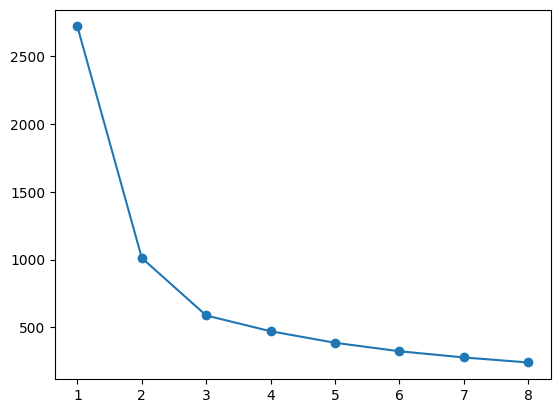

In [156]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = df.iloc[:, :-1].values
ret = []
for k in range(1, 9):
    k_means = KMeans(n_clusters=k, random_state=10)
    k_means.fit(X)
    ret.append(k_means.inertia_)
    
k_vals = range(1, 9)
plt.plot(k_vals, ret, 'o-')
plt.show()

In [157]:
# from the curve above, best k = 3

In [158]:
# 2
import random

random.seed(42)
r1 = random.randrange(0, 7)
r1

5

In [159]:
r2 = random.randrange(0, 7)
r2

0

In [160]:
X2 = df.iloc[:, [r2, r1, -1]]

X2.head()

,area,asym,class_label
0,15.26,2.221,1
1,14.88,1.018,1
2,14.29,2.699,1
3,13.84,2.259,1
4,16.14,1.355,1


d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xing\AppData\Local\Temp\ipykernel_892\2890769643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['y_pred'] = k_means.predict(X2.loc[:, ['area', 'asym']].values)


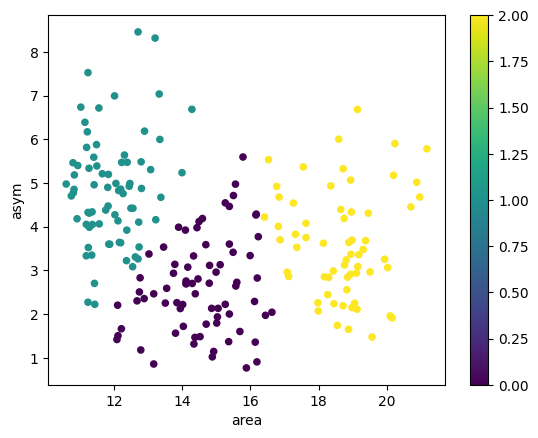

array([[14.5427027 ,  2.63412432],
       [11.93756757,  4.83916216],
       [18.68451613,  3.61348387]])

In [161]:
# X2.plot.scatter(x='len_ker', y='asym', c='class_label', colormap='viridis')
# plt.show()

k_means = KMeans(n_clusters=3, random_state=10)
k_means.fit(X2.loc[:, ['area', 'asym']].values)

X2['y_pred'] = k_means.predict(X2.loc[:, ['area', 'asym']].values)
ax = X2.plot.scatter(x='area', y='asym', c=X2['y_pred'], colormap='viridis')
# ax.scatter(k_means.cluster_centers_, c='red')
plt.show()

k_means.cluster_centers_
# pattern , cluaster is using asym as the dividing factor

In [162]:
# 3
centers = k_means.cluster_centers_
clus_cent_and_label = []
for clus_id in range(3):
    center = centers[clus_id]
    clus_df = X2[X2.y_pred == clus_id]
    print(clus_df.class_label.value_counts())
#     print(type(clus_df.class_label.value_counts()))
    clus_cent_and_label.append((center, clus_df.class_label.value_counts().idxmax()))
    
clus_cent_and_label

class_label
1    61
2     9
3     4
Name: count, dtype: int64
class_label
3    66
1     8
Name: count, dtype: int64
class_label
2    61
1     1
Name: count, dtype: int64


[(array([14.5427027 ,  2.63412432]), 1),
 (array([11.93756757,  4.83916216]), 3),
 (array([18.68451613,  3.61348387]), 2)]

In [163]:
# 4
X2.head()

,area,asym,class_label,y_pred
0,15.26,2.221,1,0
1,14.88,1.018,1,0
2,14.29,2.699,1,0
3,13.84,2.259,1,0
4,16.14,1.355,1,0


In [164]:
def get_label_using_distance(row):
    min_dis = 1000000000000
    min_clus = -1
    for clus in clus_cent_and_label:
        x = row['area']
        y = row['asym']
        cen = clus[0]
        dis = x-cen[0]
        dis = dis * dis
        dd = y -cen[1]
        dd = dd *dd
        dis += dd
        if dis < min_dis:
            min_dis = dis
            min_clus = clus[1]
            
    return min_clus
                
        

X2['center_label'] = X2.apply(lambda x: get_label_using_distance(x), axis=1)

X2.head()

C:\Users\xing\AppData\Local\Temp\ipykernel_892\2168449124.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['center_label'] = X2.apply(lambda x: get_label_using_distance(x), axis=1)


,area,asym,class_label,y_pred,center_label
0,15.26,2.221,1,0,1
1,14.88,1.018,1,0,1
2,14.29,2.699,1,0,1
3,13.84,2.259,1,0,1
4,16.14,1.355,1,0,1


In [165]:
accuracy_score(X2['class_label'] , X2['center_label'] )

0.8952380952380953

In [181]:
# 5------
df_2_lables = X2[['area', 'asym', 'class_label']][X2.class_label != 3]
df_2_lables.class_label = df_2_lables.class_label - 1

train, test = train_test_split(df_2_lables, test_size=0.5, random_state=42)


X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]


X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_test

108    1
67     0
31     0
119    1
42     0
      ..
62     0
68     0
135    1
53     0
5      0
Name: class_label, Length: 70, dtype: int64

In [183]:
k_means = KMeans(n_clusters=2, random_state=10)
k_means.fit(X_train.loc[:, ['area', 'asym']].values)

X_train['y_pred'] = k_means.predict(X_train.loc[:, ['area', 'asym']].values)
X_train['class_label'] = y_train
X_train.head()

d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,area,asym,y_pred,class_label
80,16.53,5.532,0,1
85,18.27,2.443,0,1
49,14.86,2.129,1,0
35,16.12,2.287,1,0
34,15.05,2.129,1,0


In [184]:
centers = k_means.cluster_centers_
clus_cent_and_label = []
for clus_id in range(2):
    center = centers[clus_id]
    clus_df = X_train[X_train.y_pred == clus_id]
    print(clus_df.class_label.value_counts())
#     print(type(clus_df.class_label.value_counts()))
    clus_cent_and_label.append((center, clus_df.class_label.value_counts().idxmax()))
    
clus_cent_and_label

class_label
1    33
0     1
Name: count, dtype: int64
class_label
0    30
1     6
Name: count, dtype: int64


[(array([18.50676471,  3.61858824]), 1),
 (array([14.59722222,  2.81091667]), 0)]

In [185]:
def get_label_using_distance_only_2(row):
    min_dis = 1000000000000
    min_clus = -1
    for clus in clus_cent_and_label:
        x = row['area']
        y = row['asym']
        cen = clus[0]
        dis = x-cen[0]
        dis = dis * dis
        dd = y -cen[1]
        dd = dd *dd
        dis += dd
        if dis < min_dis:
            min_dis = dis
            min_clus = clus[1]
            
    return min_clus


y_pred = X_test.apply(lambda x: get_label_using_distance_only_2(x), axis=1)
y_test = y_test
y_pred, y_test

(108    1
 67     0
 31     0
 119    1
 42     0
       ..
 62     0
 68     0
 135    0
 53     0
 5      0
 Length: 70, dtype: int64,
 108    1
 67     0
 31     0
 119    1
 42     0
       ..
 62     0
 68     0
 135    1
 53     0
 5      0
 Name: class_label, Length: 70, dtype: int64)

In [187]:
acc = accuracy_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tnr = tn / (tn + fp)
tpr = tp / (tp + fn)

tp, fp, tn, fn, acc, tpr, tnr

(28, 0, 39, 3, 0.9571428571428572, 0.9032258064516129, 1.0)

In [ ]:
# task4-classifier--- not bad